In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D://gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


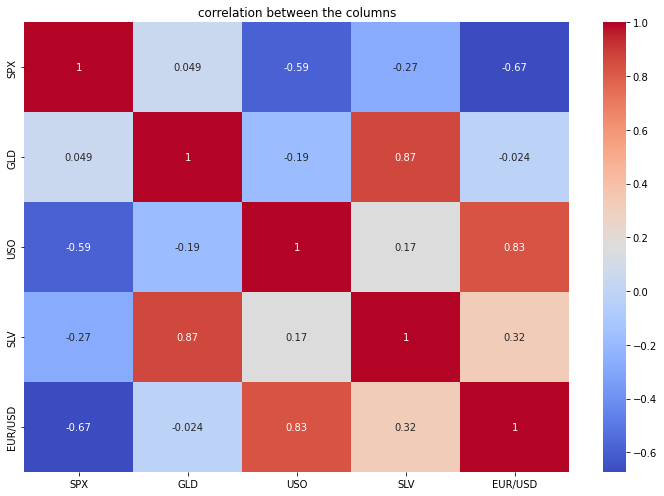

In [4]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)
plt.title('correlation between the columns')
plt.tight_layout()
plt.show()

In [5]:
from scipy.stats import skew

SPX column has skewness:0.3001650348845141
GLD column has skewness:0.3339194395208868
USO column has skewness:1.698217690149308
SLV column has skewness:1.1528851168917427
EUR/USD column has skewness:-0.005288809845896932


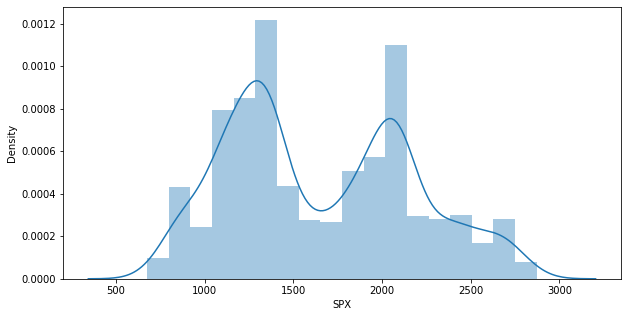

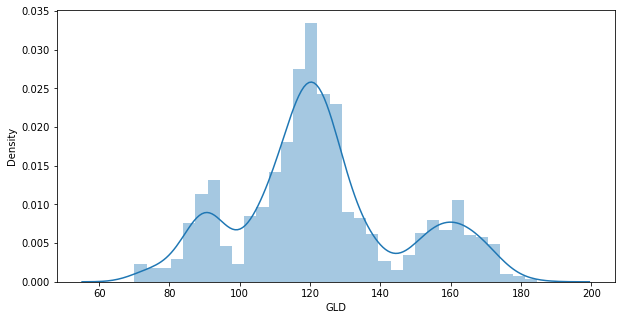

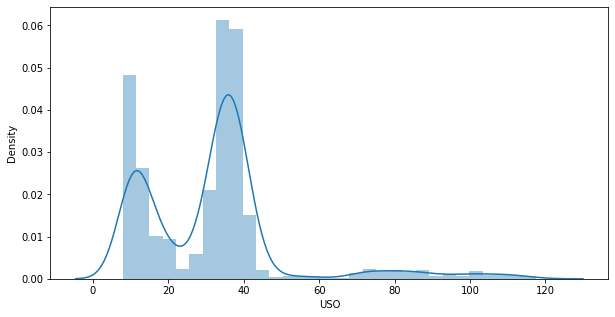

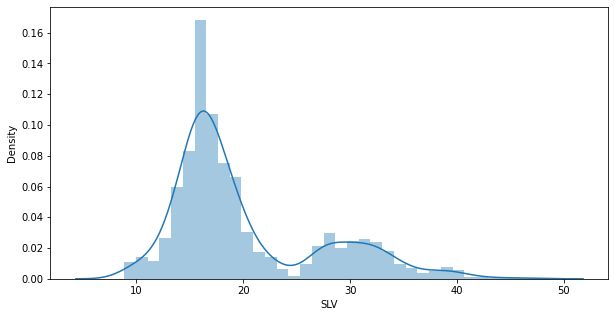

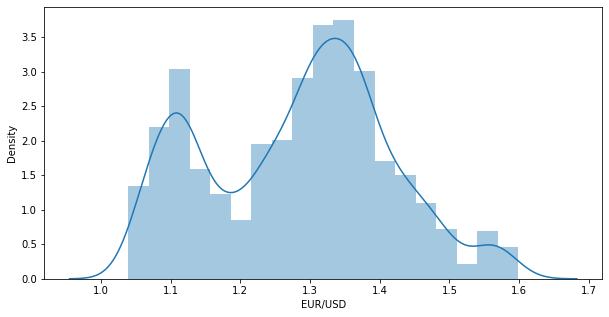

In [6]:
numvalues = df.select_dtypes(['int64','float64']).columns
for i in numvalues:
    print(f'{i} column has skewness:{skew(df[i])}')
    
    plt.rcParams['figure.figsize'] = (10,5)
    plt.figure()
    sns.distplot(df[i])

In [7]:
df["SLV"] = np.sqrt(df["SLV"])

In [8]:
x = df.drop(columns=["Date","GLD"],axis = 1)
y = df["GLD"]

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [12]:
def model(model):
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    print(r2_score(ytest,pred))
    print("-"*10)
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [13]:
model(LinearRegression())

0.8968887288875531
----------
0.9056339921604729
0.8968887288875531


In [14]:
for i in range(1,50):
        ls = Lasso(i,random_state = 1)
        model = ls.fit(xtrain,ytrain)
        train = model.score(xtrain,ytrain)
        test = model.score(xtest,ytest)
        print(("i :",i,("train : ",train,"test : ",test)))

('i :', 1, ('train : ', 0.9005070406203559, 'test : ', 0.8897280509582488))
('i :', 2, ('train : ', 0.8898974240505723, 'test : ', 0.8771608856860064))
('i :', 3, ('train : ', 0.8722134059833039, 'test : ', 0.8575729125992005))
('i :', 4, ('train : ', 0.8474549864185508, 'test : ', 0.8309641316978311))
('i :', 5, ('train : ', 0.8156221653563127, 'test : ', 0.7973345429818983))
('i :', 6, ('train : ', 0.7767149427965903, 'test : ', 0.7566841464514021))
('i :', 7, ('train : ', 0.730733318739383, 'test : ', 0.7090129421063425))
('i :', 8, ('train : ', 0.6776772931846908, 'test : ', 0.6543209299467196))
('i :', 9, ('train : ', 0.6175468661325141, 'test : ', 0.5926081099725331))
('i :', 10, ('train : ', 0.5503420375828525, 'test : ', 0.5238744821837833))
('i :', 11, ('train : ', 0.47654014330758976, 'test : ', 0.4485831150813103))
('i :', 12, ('train : ', 0.395279337229991, 'test : ', 0.36589762509122425))
('i :', 13, ('train : ', 0.30695259801142394, 'test : ', 0.27619948697380703))
('i :'

In [15]:
ls = Lasso(2,random_state = 1)
model = ls.fit(xtrain,ytrain)
train = model.score(xtrain,ytrain)
test = model.score(xtest,ytest)
print(("i :",i,("train : ",train,"test : ",test)))

('i :', 49, ('train : ', 0.8898974240505723, 'test : ', 0.8771608856860064))


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sd = StandardScaler()
x = sd.fit_transform(x)

In [18]:
x = df.drop(columns=["Date","GLD"],axis = 1)
y = df["GLD"]

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1)

In [20]:
xtrain

,SPX,USO,SLV,EUR/USD
299,888.330017,33.380001,3.786819,1.400305
906,1350.500000,38.840000,5.704384,1.315789
1570,2096.989990,19.620001,4.066940,1.140394
828,1209.880005,33.310001,5.498182,1.376500
398,1098.510010,40.549999,4.158125,1.498397
...,...,...,...,...
960,1354.579956,36.520000,5.327288,1.293661
905,1351.770020,38.689999,5.722762,1.323679
1096,1462.420044,33.820000,5.469918,1.319784
235,827.159973,26.910000,3.602777,1.291406


In [21]:
def model(model):
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    print(r2_score(ytest,pred))
    print("-"*10)
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [22]:
from sklearn.tree import DecisionTreeRegressor
model(DecisionTreeRegressor())

0.9759764987223061
----------
1.0
0.9759764987223061


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameter = {
    "max_depth":list(range(1,20)),
    "min_samples_leaf":list(range(1,20))
}

In [25]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid=parameter)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [26]:
grid.best_params_

{'max_depth': 18, 'min_samples_leaf': 4}

In [27]:
grid.best_score_

0.9812440604312584

In [28]:
model(DecisionTreeRegressor(max_depth=18, min_samples_leaf=4))

0.9775524150615862
----------
0.9949317811039765
0.9775524150615862
